![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import os
from datetime import datetime 
import pandas as pd
import opstrat as op

In [3]:
from options_backtest.qc_simulator import QuantBook, Resolution, OptionRight

In [4]:
import options_backtest.quantconnect as qc
# from strategies import measure_period_profit
# from strategies import add_expirations

In [5]:
qbw = qc.QuantBookWrapper({'qb':QuantBook(),'Resolution':Resolution,'OptionRight':OptionRight})

In [10]:
from options_backtest.strategies import measure_period_profit, LegMeta, StrategyBase
import options_backtest.plots as plots

In [ ]:
# def IC_sim(nbars=200, stop_loss=20, stop_gain=None):
#     tsla = qbw.get_tsla(nbars)
#     legs = [
#         LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
#         LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
#         LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
#         LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
#     ]  
#     strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=stop_gain, force_strike_diff=True)
#     ic = measure_period_profit(tsla,  
#         strat,
#         expiration='week',
#         update_freq='candle', 
#         combine_legs=True)
#     plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
#     plots.plot_candles_and_profit(
#         ic, lines=[f'{l.name}_strike' for l in strat.legs if 'sell' == l.trans], 
#         metrics=['strategy_close', 'stop_loss', 'stop_gain']
#     )
#     return ic

In [7]:
stop_loss=None
stop_gain=None
nbars=200

In [11]:
tsla = qbw.get_tsla(nbars)
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
    LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
]  
strat = StrategyBase(qbw=qbw, legs=legs, stop_loss=stop_loss, stop_gain=stop_gain, force_strike_diff=True)
ic = measure_period_profit(tsla,  
    strat,
    expiration='week',
    update_freq='candle', 
    combine_legs=True)
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])
plots.plot_candles_and_profit(
    ic, lines=[f'{l.name}_strike' for l in strat.legs if 'sell' == l.trans], 
    metrics=['strategy_close', 'stop_loss', 'stop_gain']
)

In [12]:
ic

,underlying_open,underlying_high,underlying_low,underlying_close,volume,strategy_open,strategy_close,hourly_profit_$,date,week,...,prev_strat_end,sell_call_15_0_exp,buy_call_16_0_exp,sell_put_-15_0_exp,buy_put_-16_0_exp,sell_call_15_0_strike,buy_call_16_0_strike,sell_put_-15_0_strike,buy_put_-16_0_strike,running_profit_$
0,304.746636,309.109969,303.333303,307.993303,10662028.0,0.002239,0.004340,0.000000,2022-08-03 13:00:00,31,...,0,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,2022-08-05 00:00:00,351.0,357.0,261.0,255.0,0.000000
1,307.943303,308.416636,306.036636,307.446636,6186187.0,0.003898,0.003468,0.087216,2022-08-03 14:00:00,31,...,0,NaN,NaN,NaN,NaN,351.0,357.0,261.0,255.0,0.087216
2,307.473303,309.466636,306.823303,307.983303,7723828.0,0.003154,0.003566,-0.009846,2022-08-03 15:00:00,31,...,0,NaN,NaN,NaN,NaN,351.0,357.0,261.0,255.0,0.077371
3,307.993303,308.756636,307.296636,307.396636,10598359.0,0.003229,0.002788,0.077788,2022-08-03 16:00:00,31,...,0,NaN,NaN,NaN,NaN,351.0,357.0,261.0,255.0,0.155159
4,311.236636,313.626635,308.866636,311.539969,14604838.0,0.000738,0.000822,0.196585,2022-08-04 10:00:00,31,...,0,NaN,NaN,NaN,NaN,351.0,357.0,261.0,255.0,0.351744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,293.680000,293.990000,290.400000,291.000000,7883773.0,0.019818,0.030887,-1.004740,2022-09-13 12:00:00,37,...,0,NaN,NaN,NaN,NaN,347.0,353.0,257.0,251.0,29.829080
196,291.000000,293.280000,290.670000,292.300000,5298142.0,0.029495,0.023534,0.735307,2022-09-13 13:00:00,37,...,0,NaN,NaN,NaN,NaN,347.0,353.0,257.0,251.0,30.564387
197,292.270000,295.500000,291.780000,294.830000,9703434.0,0.022493,0.015039,0.849517,2022-09-13 14:00:00,37,...,0,NaN,NaN,NaN,NaN,347.0,353.0,257.0,251.0,31.413904
198,294.830000,295.970000,293.000000,294.100000,7136008.0,0.014187,0.015778,-0.073908,2022-09-13 15:00:00,37,...,0,NaN,NaN,NaN,NaN,347.0,353.0,257.0,251.0,31.339996


In [13]:
fig = plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

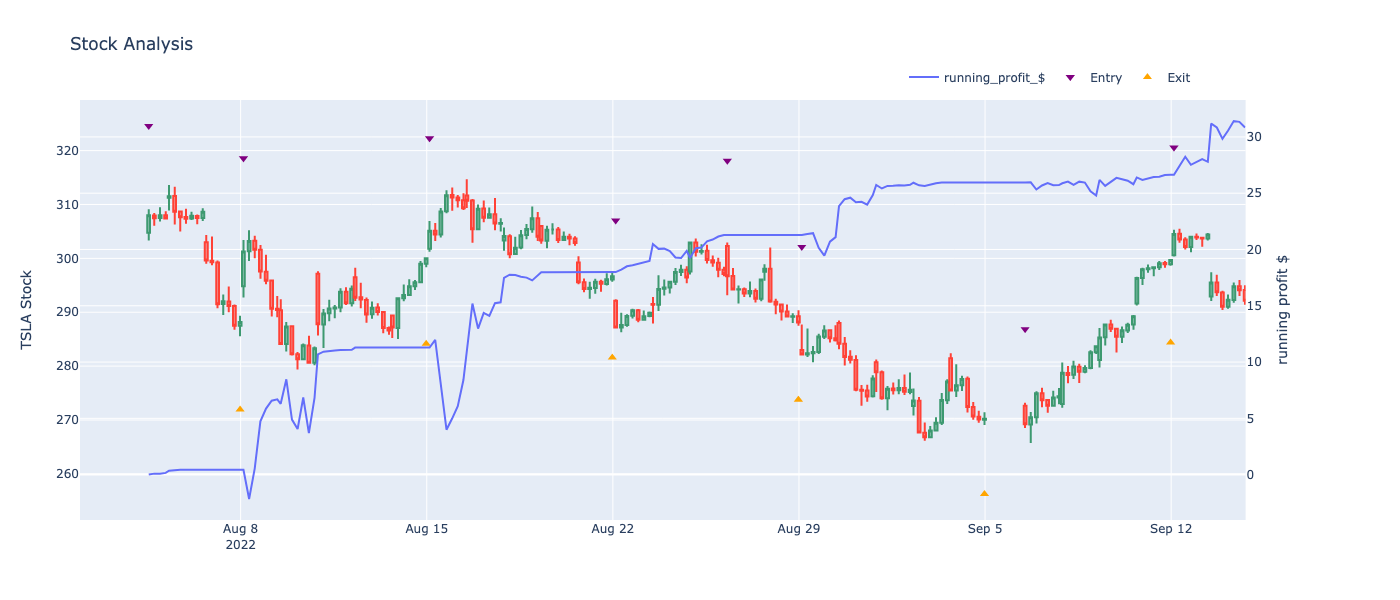

In [21]:
fig = plots.plot_candles_and_profit(ic, lines=[])

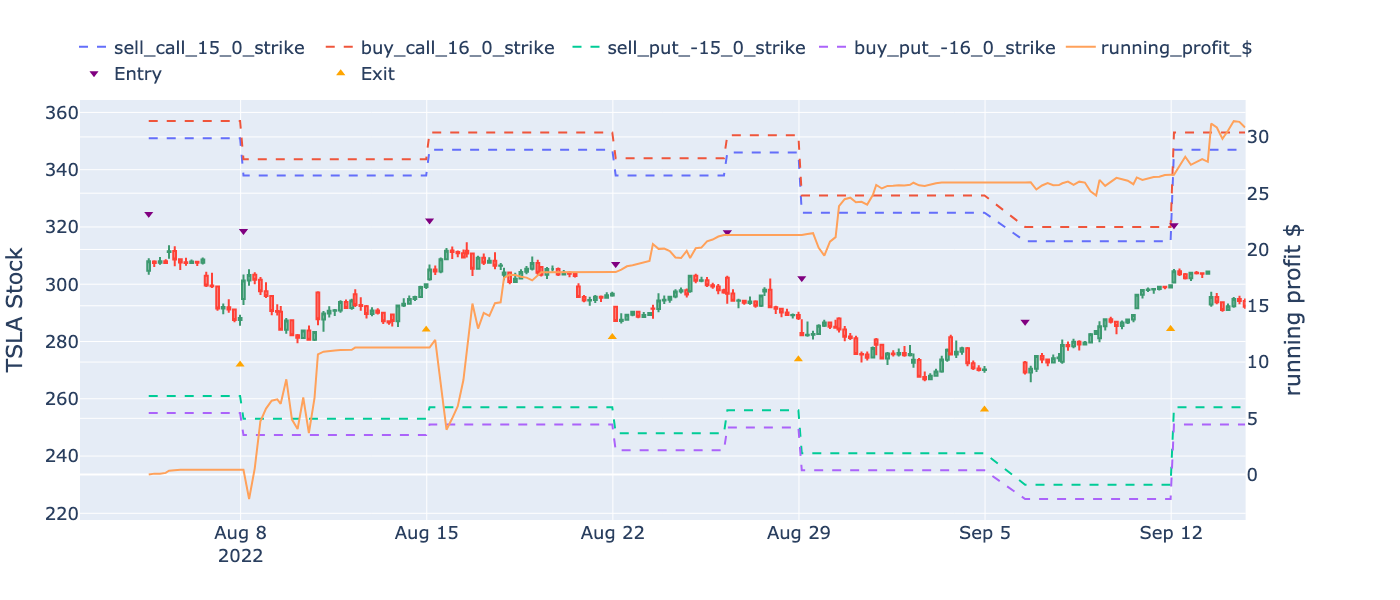

In [28]:
fig = plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])

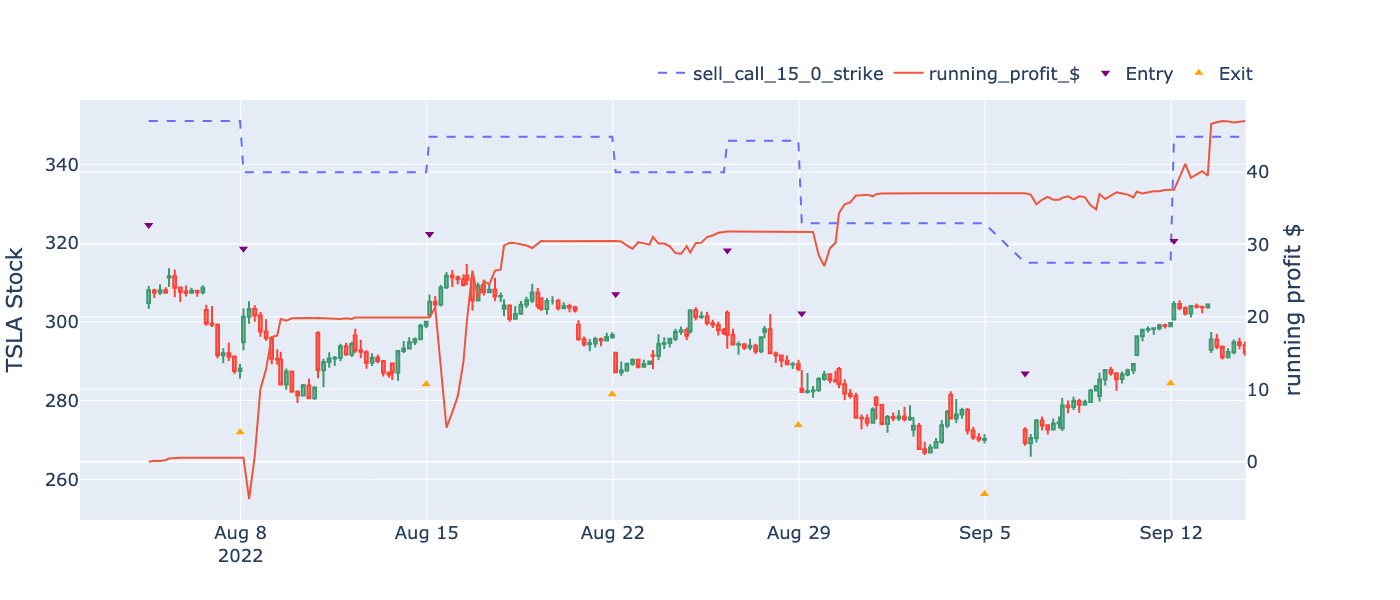

In [30]:
qbw = qc.QuantBookWrapper({'qb':QuantBook(),'Resolution':Resolution,'OptionRight':OptionRight})
tsla = qbw.get_tsla(200)
legs = [LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),]  
strat = StrategyBase(qbw=qbw, legs=legs)
ic = measure_period_profit(tsla,  strat)

plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs])